In [143]:
import pandas as pd # 데이터 분석 목적
import matplotlib.pyplot as plt # 데이터 시각화 목적(산점도 그래프)
plt.rc('font',family="Malgun Gothic") # 데이터 시각화 글씨체 지정
plt.rc('axes',unicode_minus=False) # 데이터 시각화 한글 깨짐 방지
from sklearn.linear_model import LinearRegression # 머신러닝 활용 패키지
from sklearn.model_selection import train_test_split #과적합 문제 해결 (더 랜덤하게 하기)
import warnings
warnings.filterwarnings('ignore') #warning을 무시하는 패키지

dataset=pd.read_csv("data/LinearRegressionData.csv")

ParserError: Error tokenizing data. C error: Expected 2 fields in line 25, saw 3


In [ ]:
#확률적 경사하강법 모델링
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=0)


In [ ]:
from sklearn.linear_model import SGDRegressor # 클래스로 객체 생성
sr=SGDRegressor(max_iter=100, eta0=1e-4, random_state=0, verbose=1) #max_iter=n 내려오는 작업을 n번(반복횟수) 내려오는 횟수 /최적의 값을 찾기 위한 기울기 조절, 지수형태로 표시 가능(1e-4, 1의 -4제곱/ ???
#반복횟수(max_iter,와 eta0를 통해 결과의 차이가 발생)
sr.fit(X_train, y_train)


-- Epoch 1
Norm: 0.35, NNZs: 1, Bias: 0.052848, T: 18, Avg. loss: 1459.086557
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.58, NNZs: 1, Bias: 0.088549, T: 36, Avg. loss: 1377.078721
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.77, NNZs: 1, Bias: 0.118716, T: 54, Avg. loss: 1316.421217
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.94, NNZs: 1, Bias: 0.145771, T: 72, Avg. loss: 1265.173083
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 1.10, NNZs: 1, Bias: 0.170757, T: 90, Avg. loss: 1219.392861
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 1.25, NNZs: 1, Bias: 0.194002, T: 108, Avg. loss: 1177.857453
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 1.39, NNZs: 1, Bias: 0.215872, T: 126, Avg. loss: 1139.974986
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 1.52, NNZs: 1, Bias: 0.236617, T: 144, Avg. loss: 1104.912926
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 1.65, NNZs: 1, Bias: 0.256384, T: 162, Avg. loss: 1072.206158
Total training

,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,100
,tol,0.001
,shuffle,True
,verbose,1
,epsilon,0.1
,random_state,0


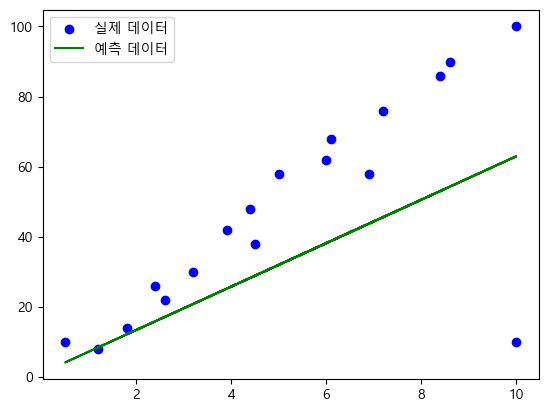

In [ ]:
plt.scatter(X_train, y_train, label='실제 데이터',color='b')
plt.plot(X_train,sr.predict(X_train), label='예측 데이터',color='g')
plt.legend()
plt.show()

In [ ]:
#y = nx + b #랜덤값 나옴
m=sr.coef_ #기울기 구하는 함수
b=sr.intercept_
m,b

(array([6.19192774]), array([0.99645489]))

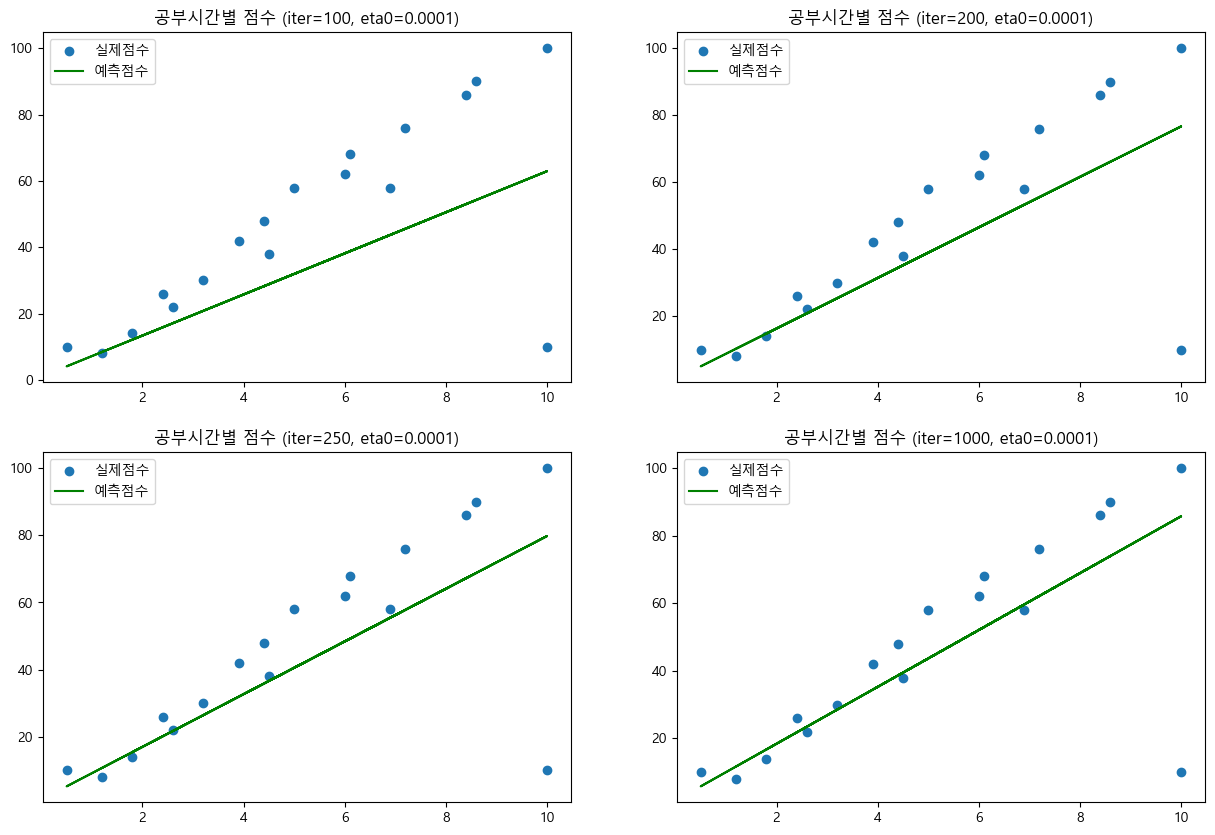

In [ ]:
#확률적 경사하강법 모델링
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=0)


iter=[100,200,250,1000]
eta0=0.0001 #1e-4
models=[]
for i in iter:
    sr=SGDRegressor(max_iter=i,eta0=eta0, random_state=0)
    sr.fit(X_train,y_train)
    models.append(sr)


#모델 만들기
fig,axs=plt.subplots(2,2,figsize=(15,10))
axs[0,0].scatter(X_train,y_train, label='실제점수')
axs[0,0].plot(X_train,models[0].predict(X_train), color='g', label='예측점수')
axs[0,0].set_title(f"공부시간별 점수 (iter={iter[0]}, eta0={eta0})")
axs[0,0].legend()

axs[0,1].scatter(X_train,y_train, label='실제점수')
axs[0,1].plot(X_train,models[1].predict(X_train), color='g', label='예측점수')
axs[0,1].set_title(f"공부시간별 점수 (iter={iter[1]}, eta0={eta0})")
axs[0,1].legend()

axs[1,0].scatter(X_train,y_train, label='실제점수')
axs[1,0].plot(X_train,models[2].predict(X_train), color='g', label='예측점수')
axs[1,0].set_title(f"공부시간별 점수 (iter={iter[2]}, eta0={eta0})")
axs[1,0].legend()

axs[1,1].scatter(X_train,y_train, label='실제점수')
axs[1,1].plot(X_train,models[3].predict(X_train), color='g', label='예측점수')
axs[1,1].set_title(f'공부시간별 점수 (iter={iter[3]}, eta0={eta0})')
axs[1,1].legend()

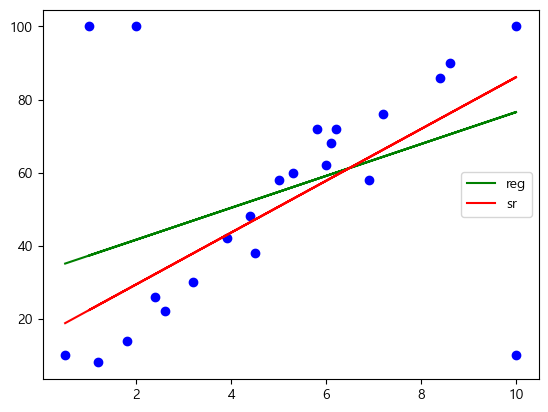

In [ ]:
import pandas as pd #데이터 가지고 오기
import matplotlib.pyplot as plt # 그래프 그리기
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression

dataset=pd.read_csv('data/LinearRegressionData.csv')
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

reg=LinearRegression()
reg.fit(X, y) # 학습시키기(최소제곱법)

sr=SGDRegressor()
sr.fit(X, y) #학습시키기(경사하강법)

#평가하기
reg.score(X,y), sr.score(X,y) #reg 평가점수(1에 가까울수록 정확함)

#그래프 만들기
plt.scatter(X, y, color='b')
plt.plot(X, reg.predict(X), label='reg', color='g')
plt.plot(X, sr.predict(X), label='sr', color='r')
plt.legend()
plt.show()

In [ ]:
#One-Hot Encording (home - library - cafe) home/library 데이터만을 통해 cafe 0,1 여부를 알 수 있음()

Text(0, 0.5, '시험점수')

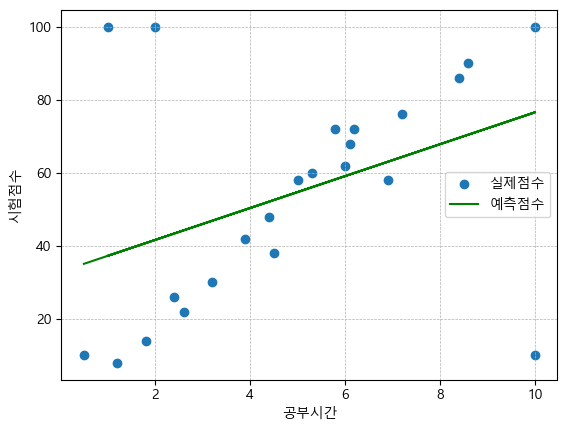

In [ ]:
dataset=pd.read_csv('data\LinearRegressionData.csv')
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

plt.scatter(X, y, label='실제점수')
plt.plot(X, reg.predict(X), label='예측점수', color='g')
plt.grid(True, ls='--', lw=0.5)
plt.legend()
plt.xlabel('공부시간')
plt.ylabel('시험점수')

In [ ]:
#9/23 다중선형회귀(OneHotEncording)
import pandas as pd
dataset=pd.read_csv('data/MultipleLinearRegressionData.csv')
dataset.head(5)

# X,y 가져오기
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values
X.shape, y.shape #X는 (20,3) y는 20행만 

#Column을 변경해주는 함수
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(
    transformers=[('encorder',OneHotEncoder(drop='first'),[2])],
    remainder='passthrough'
)
X_trans=ct.fit_transform(X)
X_trans[:5], X[:5]

(array([[1.0, 0.0, 0.5, 3],
        [0.0, 1.0, 1.2, 4],
        [0.0, 0.0, 1.8, 2],
        [0.0, 0.0, 2.4, 0],
        [1.0, 0.0, 2.6, 2]], dtype=object),
 array([[0.5, 3, 'Home'],
        [1.2, 4, 'Library'],
        [1.8, 2, 'Cafe'],
        [2.4, 0, 'Cafe'],
        [2.6, 2, 'Home']], dtype=object))

In [ ]:
from sklearn.model_selection import train_test_split
dataset=pd.read_csv('data/MultipleLinearRegressionData.csv')
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values
from sklearn.linear_model import LinearRegression
X_train,X_test,y_train,y_test=train_test_split(X_trans,y, test_size=0.2,random_state=0)
reg=LinearRegression()
reg.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:

reg.coef_

array([-5.82712824, -1.04450647, 10.40419528, -1.64200104])

In [ ]:
m1=reg.coef_[0] #집공부
m2=reg.coef_[1] #도서관공부
m3=0 #카페공부
m4=reg.coef_[2]#공부시간
m5=reg.coef_[3] #결석횟수
m1,m2,m3,m4,m5
x=['집공부','도서관공부','카페공부','공부시간','결석횟수'] #x 제목
y=[m1,m2,m3,m4,m5]

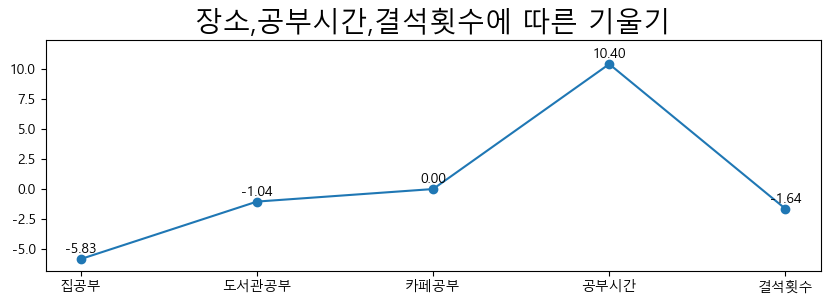

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,3))
plt.plot(x,y, marker='o')
plt.title('장소,공부시간,결석횟수에 따른 기울기',size=20)
plt.ylim((min(y)-1),max(y)+2)
for idx, m in enumerate(y):
    plt.text(idx,m+0.5,f'{m:.2f}', ha='center')
plt.show()

In [ ]:
#카페에서 9시간 공부, 1일 결석
reg.predict([[0,0,9,1]])
#도서관에서 9시간 공부 1일 결석
reg.predict([[0,1,9,1]])
#집에서 9시간 공부 1일 결석
reg.predict([[1,0,9,1]])

array([91.53363494])

In [ ]:
#9/23 다중선형회귀모델생성함수
def model_linear():
    import pandas as pd
    from sklearn.compose import ColumnTransformer
    from sklearn.preprocessing import OneHotEncoder
    from sklearn.model_selection import train_test_split
    dataset=pd.read_csv('data/MultipleLinearRegressionData.csv')
    X=dataset.iloc[:,:-1]
    y=dataset.iloc[:,-1]
    
    ct=ColumnTransformer(
    transformers=[('encorder',OneHotEncoder(drop='first'),[2])],
    remainder='passthrough')
    X_trans=ct.fit_transform(X)

    X_train,X_test,y_train,y_test=train_test_split(X_trans,y, test_size=0.2,random_state=0)
    reg=LinearRegression()
    reg.fit(X_train,y_train)
    return reg


    

In [ ]:
model=model_linear()
model.predict([[1,0,9,1]]), reg.predict([[1,0,9,1]])

(array([88.24092144]), array([91.53363494]))

In [ ]:
places={'home':[1,0],'library':[0,1], 'cafe':[0,0]}
places['home']
places.get('home','없음')
#___________가져오는 장소
place='library'
place=places.get(place)
place1=place[0]
place2=place[1]
hour=9
absence=1
model.predict([[place1,place2,hour,absence]])

array([93.41720286])

In [ ]:
#예측하는 함수
def predict(place, hour, absence):
    places={'home':[1,0],'library':[0,1], 'cafe':[0,0]}
    p1=places.get(place)[0]
    p2=places.get(place)[1]
    model=model_linear()
    pred=model.predict([[p1,p2,hour,absence]])
    print(f"장소: {place}|시간: {hour}|결석횟수: {absence}|예상점수:{pred[0]:.2f}")
    

In [ ]:
predict('home',3,0)
df_y=pd.DataFrame(y_train)
df_y.columns=['실제점수']
df_y.head()

장소: home|시간: 3|결석횟수: 0|예상점수:29.71


,실제점수
0,60
1,86
2,42
3,68
4,22


In [ ]:

y_pred=reg.predict(X_train)
df_pred=pd.DataFrame(y_pred)
df_pred.columns=['예측점수']
df_pred.head()

,예측점수
0,57.223240
1,85.291118
2,44.896862
3,67.188597
4,23.304784


In [ ]:
df_join=df_y.join(df_pred)
df_join.head()

,실제점수,예측점수
0,60,57.223240
1,86,85.291118
2,42,44.896862
3,68,67.188597
4,22,23.304784


In [139]:
df_X=pd.DataFrame(X_train)
df_X.columns=['장소1','장소2','공부시간','결석횟수']
df_X.head()

df=df_X.join(df_join)
df['장소1']=df['장소1'].astype(int)
df['장소2']=df['장소2'].astype(int)
df.head()

,장소1,장소2,공부시간,결석횟수,실제점수,예측점수
0,0,0,5.3,2,60,57.223240
1,1,0,8.4,1,86,85.291118
2,0,1,3.9,0,42,44.896862
3,0,0,6.1,1,68,67.188597
4,1,0,2.6,2,22,23.304784


In [140]:
def place(x):
    x1=x.iloc[0]
    x2=x.iloc[1]
    if(x1==1) & (x2==0):
        return 'home'
    elif (x1==0) & (x2==1):
        return 'library'
    elif(x1==0) & (x2==0):
        return 'cafe'

df['장소']=df[['장소1','장소2']].apply(place,axis=1)
df.head()


,장소1,장소2,공부시간,결석횟수,실제점수,예측점수,장소
0,0,0,5.3,2,60,57.223240,cafe
1,1,0,8.4,1,86,85.291118,home
2,0,1,3.9,0,42,44.896862,library
3,0,0,6.1,1,68,67.188597,cafe
4,1,0,2.6,2,22,23.304784,home


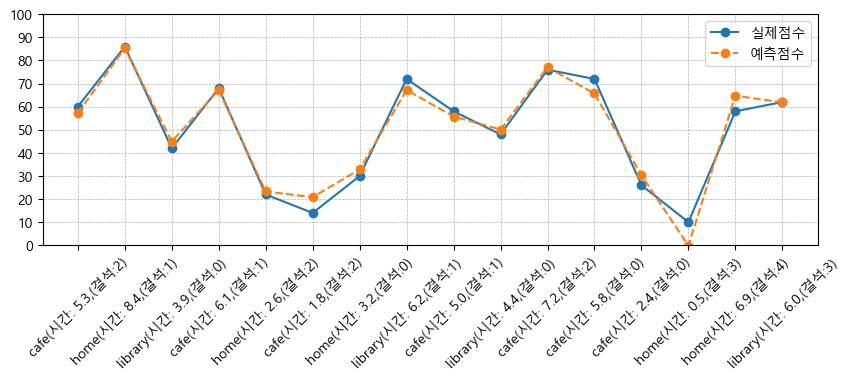

In [142]:
plt.figure(figsize=(10,3))
plt.plot(df.index,df['실제점수'],marker='o',label='실제점수')
plt.plot(df.index,df['예측점수'],marker='o',label='예측점수',ls='--')
xticks=[ f'{df.loc[x,"장소"]}(시간: {df.loc[x,"공부시간"]},(결석:{df.loc[x,"결석횟수"]})' for x in df.index]
plt.xticks(df.index, xticks, size=10,rotation=45)
plt.ylim(0,100)
plt.yticks([y for y in range(0,101,10)],size=10)
plt.grid(True,ls='--',lw=0.5)
plt.legend()
plt.show()
